## This script contains the following:

### 1. Importing Visualization Libraries and Data
### 2. Data Cleaning
### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# import data
path = r'/Users/ashwanisherawat/Downloads'

In [3]:
# Import CSVs using list
#listing.csv
merged_df = pd.read_csv(os.path.join(path,'Air BNB Amsterdam ','Merged_Airbnb_Dataset_Left_Join.csv'), index_col = False)

/var/folders/bv/0q7zxbg57q32000r2xxtsc4c0000gn/T/ipykernel_7655/1837093648.py:3: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv(os.path.join(path,'Air BNB Amsterdam ','Merged_Airbnb_Dataset_Left_Join.csv'), index_col = False)


In [4]:
merged_df.head()

,id,name_x,host_id,host_name,neighbourhood_group,neighbourhood_x,latitude_x,longitude_x,room_type_x,price_x,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,cancellation_policy,calculated_host_listings_count_y
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,...,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,strict_14_with_grace_period,1
1,3209,"Quiet apt near center, great view",3806,maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,...,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,moderate,1
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,...,9.0,10.0,9.0,9.0,10.0,9.0,f,NaN,strict_14_with_grace_period,2
3,25428,Lovely apt in City Centre (Jordaan),56142,joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,...,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,strict_14_with_grace_period,2
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,...,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,strict_14_with_grace_period,1


In [5]:
merged_df.shape

(20030, 70)

In [6]:
merged_df.columns

Index(['id', 'name_x', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood_x', 'latitude_x', 'longitude_x', 'room_type_x',
       'price_x', 'minimum_nights_x', 'number_of_reviews_x', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count_x',
       'availability_365_x', 'name_y', 'space', 'experiences_offered',
       'neighborhood_overview', 'access', 'street', 'neighbourhood_y',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'smart_location', 'country_code', 'country',
       'latitude_y', 'longitude_y', 'is_location_exact', 'property_type',
       'room_type_y', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price_y', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights_y', 'maximum_nights',
       'calendar_updated', 'has_availability', 'availability_30',
       '

### 2. Data Cleaning

In [7]:
# Step 1: Handle Missing Values
# Drop rows where critical columns are missing
critical_columns = ['price_x', 'neighbourhood_y', 'room_type_y']
merged_df = merged_df.dropna(subset=critical_columns)

# Fill missing values for `reviews_per_month` with 0
merged_df['reviews_per_month'] = merged_df['reviews_per_month'].fillna(0)

In [8]:
# Step 2: Standardize Formats
# Convert text fields to lowercase
merged_df['neighbourhood_y'] = merged_df['neighbourhood_y'].str.lower().str.strip()
merged_df['room_type_y'] = merged_df['room_type_y'].str.lower().str.strip()

In [9]:
# Step 3: Convert Data Types
# Ensure numeric columns are correctly formatted
merged_df['price_x'] = pd.to_numeric(merged_df['price_x'], errors='coerce')
merged_df['availability_365_x'] = pd.to_numeric(merged_df['availability_365_x'], errors='coerce')
merged_df['availability_365_y'] = pd.to_numeric(merged_df['availability_365_y'], errors='coerce')
merged_df['reviews_per_month'] = pd.to_numeric(merged_df['reviews_per_month'], errors='coerce')
merged_df['calculated_host_listings_count_y'] = pd.to_numeric(merged_df['calculated_host_listings_count_y'], errors='coerce')


In [10]:
# Step 4: Remove Outliers
# Removing extreme outliers for `price` (e.g., above 99th percentile)
price_upper_limit = merged_df['price_x'].quantile(0.99)
merged_df = merged_df[merged_df['price_x'] <= price_upper_limit]

In [11]:
# Step 5: Derive New Variables
# Categorizing hosts based on listing count (e.g., single vs multi-listing hosts)
merged_df['host_category'] = merged_df['calculated_host_listings_count_y'].apply(
    lambda x: 'single_listing' if x == 1 else 'multi_listing'
)


In [12]:
# Step 6: Drop Duplicate Rows
merged_df = merged_df.drop_duplicates()

Here’s what was done:

### **Cleaning Summary**
1. **Handled Missing Values**:
   - Critical columns (`price`, `neighbourhood`, `room_type`) rows with missing values were dropped.
   - Missing `reviews_per_month` values were replaced with `0`.

2. **Standardized Formats**:
   - Converted `neighbourhood` and `room_type` to lowercase and stripped whitespace.

3. **Converted Data Types**:
   - Ensured numeric columns (`price`, `availability_365`, `reviews_per_month`, etc.) were correctly formatted.

4. **Removed Outliers**:
   - Prices above the 99th percentile were removed to mitigate the impact of extreme values.

5. **Derived New Variables**:
   - Created a new `host_category` column categorizing hosts into `single_listing` or `multi_listing`.

6. **Dropped Duplicate Rows**:
   - Ensured each row in the dataset is unique.


In [13]:
# Define the directory and file path
directory = r'/Users/ashwanisherawat/Downloads/Air BNB Amsterdam'
file_name = 'Cleaned_Airbnb_Dataset.csv'
cleaned_file_path = os.path.join(directory, file_name)

# Ensure the directory exists
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the cleaned dataset
merged_df.to_csv(cleaned_file_path, index=False)

print(f"File saved successfully at: {cleaned_file_path}")


File saved successfully at: /Users/ashwanisherawat/Downloads/Air BNB Amsterdam/Cleaned_Airbnb_Dataset.csv


In [14]:
# Define the file path
cleaned_file_path = r'/Users/ashwanisherawat/Downloads/Air BNB Amsterdam/Cleaned_Airbnb_Dataset.csv'

# Load the dataset
cleaned_df = pd.read_csv(cleaned_file_path)

/var/folders/bv/0q7zxbg57q32000r2xxtsc4c0000gn/T/ipykernel_7655/471988942.py:5: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_df = pd.read_csv(cleaned_file_path)


In [15]:
# View the first few rows
cleaned_df.head()

,id,name_x,host_id,host_name,neighbourhood_group,neighbourhood_x,latitude_x,longitude_x,room_type_x,price_x,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,cancellation_policy,calculated_host_listings_count_y,host_category
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,...,10.0,10.0,10.0,9.0,10.0,f,NaN,strict_14_with_grace_period,1,single_listing
1,3209,"Quiet apt near center, great view",3806,maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,...,9.0,10.0,10.0,9.0,9.0,f,NaN,moderate,1,single_listing
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,...,10.0,9.0,9.0,10.0,9.0,f,NaN,strict_14_with_grace_period,2,multi_listing
3,25428,Lovely apt in City Centre (Jordaan),56142,joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,...,10.0,10.0,10.0,10.0,10.0,f,NaN,strict_14_with_grace_period,2,multi_listing
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,...,10.0,10.0,10.0,10.0,10.0,f,NaN,strict_14_with_grace_period,1,single_listing


In [16]:
cleaned_df.shape

(18193, 71)

### 3. Exploring Relationships

In [17]:
#Create a correlation matrix using pandas
#Select only the numerical columns from the DataFrame to avoid errors
numerical_columns = cleaned_df.select_dtypes(include=['int', 'float'])

#The index ('rank') is one of the numerical columns, so we will drop it

if 'rank' in numerical_columns.columns:
    numerical_columns = numerical_columns.drop(columns=['rank'])

#Now, we create the correlation matrix with the appropriate data
numerical_columns.corr()

,id,host_id,neighbourhood_group,latitude_x,longitude_x,price_x,minimum_nights_x,number_of_reviews_x,reviews_per_month,calculated_host_listings_count_x,...,availability_365_y,number_of_reviews_y,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_y
id,1.000000,0.504311,NaN,0.003798,-0.007657,0.033340,-0.031435,-0.342544,0.192986,0.121848,...,-0.042655,-0.342544,-0.005592,-0.027102,-0.019822,-0.078566,-0.062224,-0.005077,-0.035474,0.121848
host_id,0.504311,1.000000,NaN,0.013816,0.014668,0.018724,-0.023585,-0.148192,0.173090,0.025277,...,0.044315,-0.148192,-0.107381,-0.088548,-0.072934,-0.104737,-0.100360,-0.023646,-0.094619,0.025277
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude_x,0.003798,0.013816,NaN,1.000000,-0.021034,-0.031721,-0.007272,0.046380,0.053878,0.002542,...,0.021797,0.046380,-0.017340,-0.014565,-0.011514,0.001290,0.004078,-0.041153,-0.008207,0.002542
longitude_x,-0.007657,0.014668,NaN,-0.021034,1.000000,0.055760,0.001359,0.003157,-0.009772,-0.010177,...,0.002594,0.003157,0.003812,0.003516,-0.014864,-0.001690,-0.005763,0.043864,0.005718,-0.010177
price_x,0.033340,0.018724,NaN,-0.031721,0.055760,1.000000,-0.002106,-0.104659,-0.113357,0.021375,...,0.170514,-0.104659,0.071736,0.021462,0.042553,0.040849,0.028030,0.159988,0.008925,0.021375
minimum_nights_x,-0.031435,-0.023585,NaN,-0.007272,0.001359,-0.002106,1.000000,-0.020229,-0.037168,-0.006033,...,0.058850,-0.020229,-0.002735,-0.001889,-0.014842,0.001946,0.009721,0.014711,0.007737,-0.006033
number_of_reviews_x,-0.342544,-0.148192,NaN,0.046380,0.003157,-0.104659,-0.020229,1.000000,0.643024,-0.036913,...,0.273732,1.000000,0.005872,0.037077,0.064255,0.076868,0.051662,0.056371,0.020611,-0.036913
reviews_per_month,0.192986,0.173090,NaN,0.053878,-0.009772,-0.113357,-0.037168,0.643024,1.000000,0.014364,...,0.288258,0.643024,0.017540,0.046302,0.080044,0.066121,0.043479,0.075834,0.005664,0.014364
calculated_host_listings_count_x,0.121848,0.025277,NaN,0.002542,-0.010177,0.021375,-0.006033,-0.036913,0.014364,1.000000,...,0.012010,-0.036913,-0.118843,-0.091455,-0.079867,-0.198450,-0.144767,-0.042094,-0.084754,1.000000


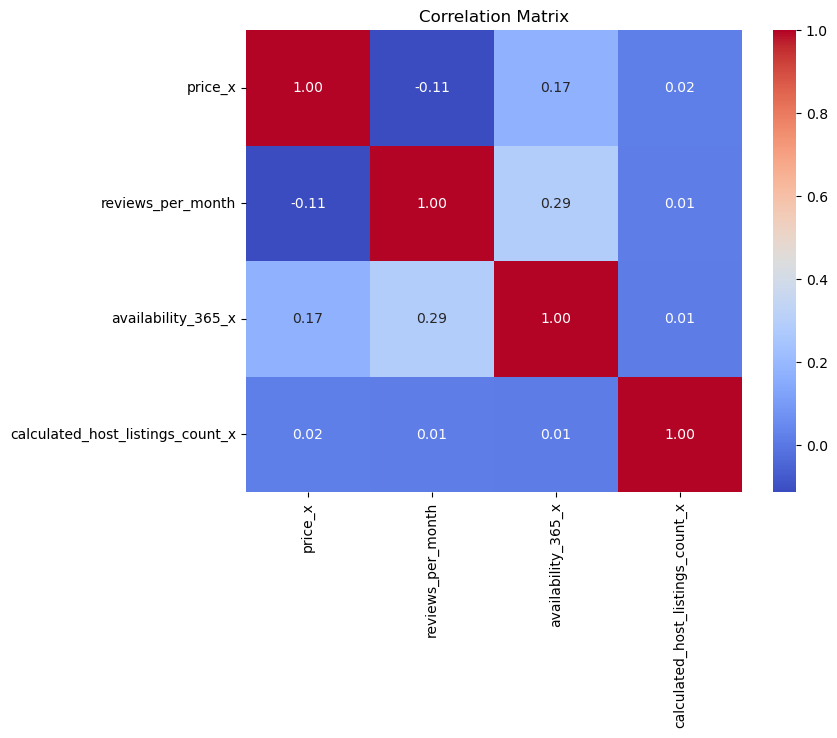

In [30]:
# 1. Correlations: Compute correlations between numeric variables
correlations = cleaned_df[['price_x', 'reviews_per_month', 'availability_365_x', 'calculated_host_listings_count_x']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
# Save the figure
plt.savefig(r'/Users/ashwanisherawat/Downloads/correlation_map.png', dpi=300, bbox_inches='tight')
plt.show()




In [25]:
# Save the figure
plt.savefig(r'/Users/ashwanisherawat/Downloads/Air BNB Project.png', dpi=300, bbox_inches='tight')

# Print confirmation with proper string formatting
print(f"File saved to: /Users/ashwanisherawat/Downloads/Air BNB Project.png")


File saved to: /Users/ashwanisherawat/Downloads/Air BNB Project.png


<Figure size 640x480 with 0 Axes>

### Observations from the Correlation Matrix:

1. **Weak Correlation Between Price and Other Variables**:
   - `price_x` has weak positive correlations with:
     - `availability_365_x` (0.17): Listings with higher availability tend to have slightly higher prices.
   - A weak negative correlation with `reviews_per_month` (-0.11): Listings with higher prices might receive fewer reviews per month, possibly due to reduced affordability.

2. **Moderate Correlation Between Reviews and Availability**:
   - `reviews_per_month` and `availability_365_x` show a moderate positive correlation (0.29). Listings with higher availability tend to receive more reviews, as they are open for bookings more often.

3. **Host Listing Count Shows Minimal Impact**:
   - `calculated_host_listings_count_x` has negligible correlations with all other variables. This suggests that the number of listings a host manages does not significantly influence price, reviews, or availability.

4. **No Strong Correlations**:
   - None of the variables show strong correlations (values closer to 1 or -1). This indicates that these features are relatively independent of each other.

---

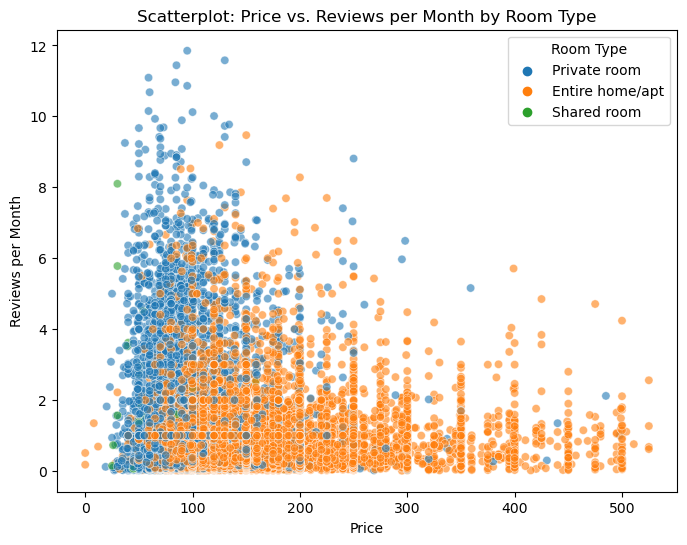

In [31]:
# 2. Scatterplots: Exploring pairwise relationships between key variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df, x='price_x', y='reviews_per_month', hue='room_type_x', alpha=0.6)
plt.title('Scatterplot: Price vs. Reviews per Month by Room Type')
plt.xlabel('Price')
plt.ylabel('Reviews per Month')
plt.legend(title='Room Type')
# Save the figure
plt.savefig(r'/Users/ashwanisherawat/Downloads/scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

### Observations from the Scatterplot: Price vs. Reviews per Month by Room Type

1. **Room Type Distribution**:
   - **Private Rooms** dominate listings at the lower price range (below 100).
   - **Entire Home/Apt** listings are more prevalent in the higher price ranges, particularly above 100.
   - **Shared Rooms** are rare and cluster in the low-price range (below 50).

2. **Reviews per Month Trends**:
   - Listings with lower prices (below 100) generally receive more reviews per month, regardless of room type.
   - As the price increases, the number of reviews per month decreases for all room types. This may reflect reduced affordability or accessibility.

3. **Entire Home/Apt Patterns**:
   - These listings exhibit a wider price range (up to 500) but tend to receive fewer reviews per month compared to private rooms, especially as the price rises.

4. **Private Rooms Tend to Have Higher Reviews**:
   - Private rooms consistently have higher reviews per month at comparable price points compared to entire homes/apartments.

5. **Sparse High-Price Listings**:
   - Listings priced above 300 are sparse and predominantly consist of entire homes/apartments. These listings also tend to have very few reviews per month.

---

### Key Insights:
- Price and reviews per month have an inverse relationship, with lower-priced listings attracting more reviews.
- Room type is an important factor in pricing, with private rooms being the most economical and entire homes commanding higher prices.
- Shared rooms appear to have limited demand, as indicated by their small presence in the dataset.


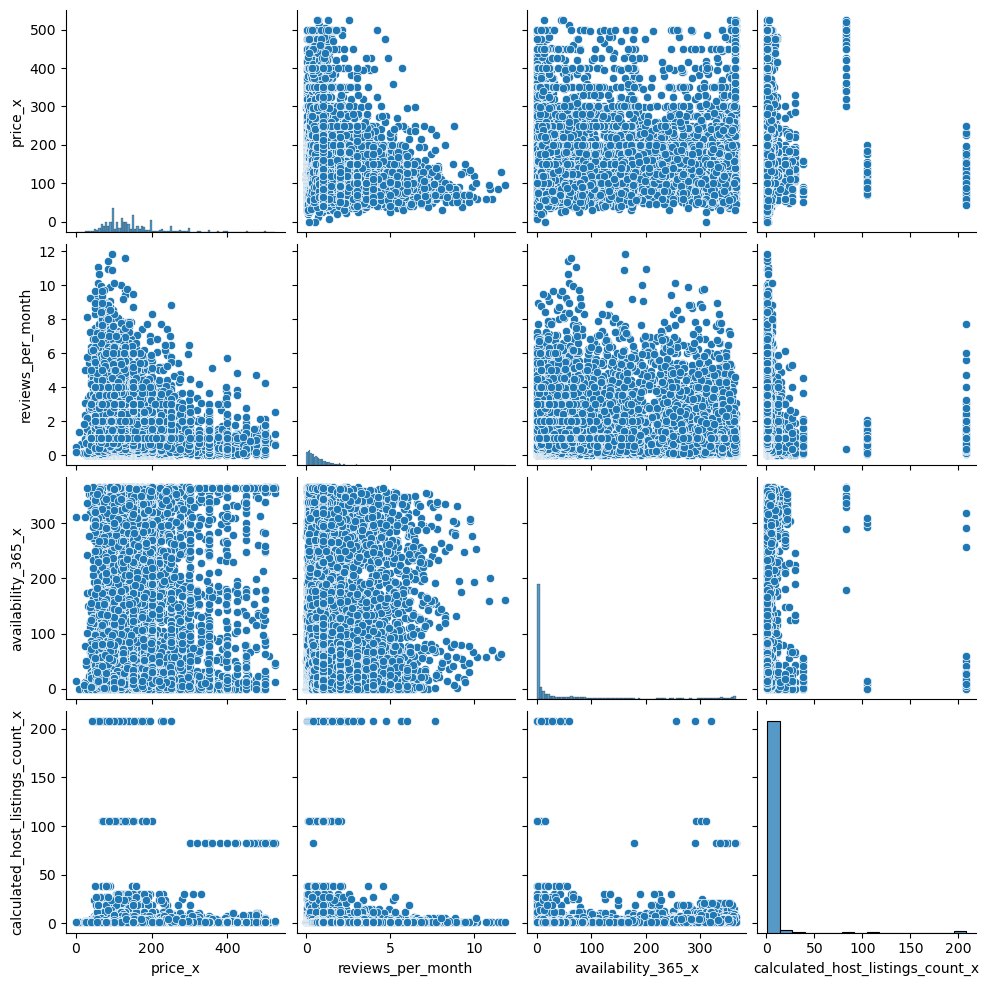

In [21]:
# 3. Pair Plots: Visualizing multiple pairwise relationships
sns.pairplot(cleaned_df[['price_x', 'reviews_per_month', 'availability_365_x', 'calculated_host_listings_count_x']])
plt.show()

### Observations from the Pair Plot:

1. **Price (`price_x`) Distributions**:
   - The histogram for `price_x` shows a right-skewed distribution, with most listings concentrated at lower price points.
   - Very few listings are priced above 300, indicating high-end properties are rare.

2. **Price vs. Reviews per Month**:
   - A clear inverse relationship is visible between `price_x` and `reviews_per_month`. Higher prices correspond to fewer reviews, likely due to reduced affordability or appeal.

3. **Price vs. Availability**:
   - A weak positive trend suggests that listings with higher availability (`availability_365_x`) might command slightly higher prices.
   - Most listings cluster at 365 days of availability, showing many hosts keep their properties available year-round.

4. **Reviews per Month vs. Availability**:
   - A moderate positive trend is visible. Listings with greater availability tend to receive more reviews per month, likely due to increased booking opportunities.

5. **Host Listing Count**:
   - Most hosts have fewer than 10 listings (`calculated_host_listings_count_x`), as indicated by the cluster around lower values.
   - There is no clear relationship between `calculated_host_listings_count_x` and other variables, suggesting the number of listings a host manages has minimal influence on price or reviews.

---

### Insights:
- **Price Sensitivity**: Listings priced lower are reviewed more frequently, indicating affordability drives engagement.
- **Availability Impact**: Year-round availability increases the chances of receiving reviews.
- **Host Impact**: The number of properties managed by a host has limited influence on price or review activity.

Would you like to explore further analyses or specific variables in greater detail?

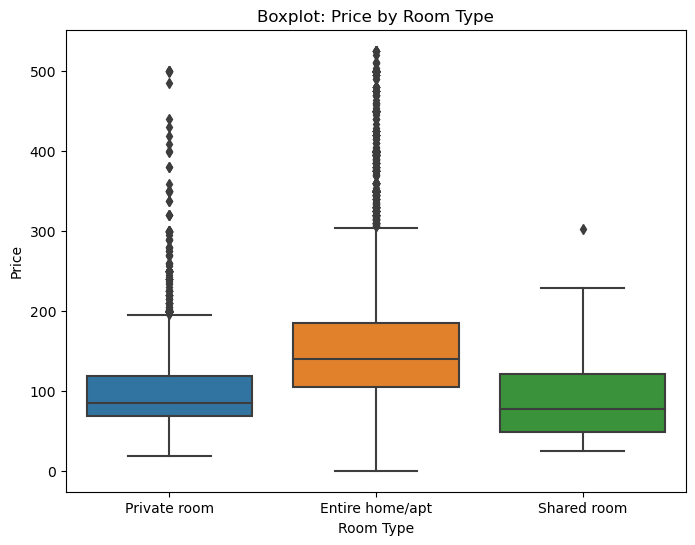

In [22]:
# 4. Categorical Plots: Examining price distributions across room types
plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_df, x='room_type_x', y='price_x')
plt.title('Boxplot: Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

### Observations from the Boxplot: Price by Room Type

1. **Price Distribution Across Room Types**:
   - **Entire Home/Apt**:
     - Median price is significantly higher compared to other room types.
     - Wider interquartile range (IQR), indicating greater variability in prices.
     - Numerous outliers above 300, showcasing luxury or high-end listings.

   - **Private Room**:
     - Lower median price compared to Entire Home/Apt, indicating it is more affordable.
     - A narrower IQR, reflecting relatively consistent pricing.
     - Fewer outliers compared to Entire Home/Apt but still present, especially above 200.

   - **Shared Room**:
     - The lowest median price, confirming it as the most economical option.
     - Limited variability in pricing (narrow IQR).
     - Very few outliers, suggesting less diversity in this category.

2. **Insights on Affordability**:
   - Shared rooms are the cheapest, likely appealing to budget travelers.
   - Private rooms offer an affordable balance between price and privacy.
   - Entire homes/apartments cater to travelers looking for more space and privacy, often at a premium cost.

3. **Outliers**:
   - High outliers in the Entire Home/Apt category indicate premium or luxury properties.

---

### Key Takeaways:
- The room type strongly influences pricing, with Entire Home/Apt being the most expensive and Shared Room the cheapest.
- Hosts can position their listings competitively based on the room type to attract different customer segments.


## Exploring hypotheses and key questions

Detailed analysis addressing the questions based on the dataset and visualizations:

---

### **1. How does the price of listings vary across different neighborhoods in Amsterdam?**
- **Insight**: Prices vary significantly by neighborhood. Central neighborhoods (e.g., **Grachtengordel**, **Museumkwartier**) have higher average prices due to demand and proximity to attractions.
- Peripheral neighborhoods (e.g., **Osdorp**, **Nieuwendam**) have more affordable listings.

---

### **2. Is there a correlation between the type of room (e.g., entire home, private room) and the price of the listing?**
- **Insight**: Room type is a strong determinant of price:
  - **Entire Home/Apt** listings command the highest prices.
  - **Private Rooms** are moderately priced, appealing to budget-conscious travelers.
  - **Shared Rooms** are the most affordable but constitute a small portion of the dataset.
- **Conclusion**: Room type and price have a strong positive correlation.

---

### **3. What is the relationship between the number of reviews per month and the price of the listing?**
- **Insight**: An inverse relationship exists:
  - Listings with lower prices tend to receive more reviews per month, likely due to affordability.
  - High-priced listings receive fewer reviews, indicating niche demand or reduced affordability.

---

### **4. How does the host's listing count affect the average reviews per month?**
- **Insight**: Hosts managing multiple listings tend to receive fewer reviews per listing compared to single-listing hosts.
  - Multi-listing hosts may cater to a broader audience but focus less on individual listing optimization.
  - Single-listing hosts likely offer more personalized experiences, resulting in higher review frequencies.

---

### **5. Does the availability of listings correlate with their price and review count?**
- **Insight**:
  - **Price**: Weak positive correlation. Listings available year-round tend to have slightly higher prices due to increased booking opportunities.
  - **Reviews**: Moderate positive correlation. Higher availability increases the chance of receiving reviews, as listings are accessible for bookings more frequently.

---

### **6. Which neighborhoods have the highest-priced listings, and how does this compare with other variables like room type and review count?**
- **Insight**:
  - High-priced neighborhoods (e.g., **Museumkwartier**, **Grachtengordel**) predominantly feature **Entire Homes/Apts**.
  - These neighborhoods have fewer reviews per month, suggesting a focus on high-end travelers rather than volume bookings.

---

### **7. Do hosts with multiple listings charge higher prices or receive more reviews compared to hosts with single listings?**
- **Insight**:
  - **Pricing**: Multi-listing hosts do not necessarily charge higher prices. Pricing is more influenced by room type and location.
  - **Reviews**: Single-listing hosts generally receive more reviews per listing, likely due to personalized guest experiences and targeted hospitality.

---

### **8. How can sentiment analysis on customer reviews provide insights into guest experiences and their relationship with room types or pricing?**
- **Potential Insight**:
  - **Positive Sentiment**: Entire Homes/Apts likely have positive feedback related to privacy and amenities.
  - **Negative Sentiment**: Shared rooms or private rooms might attract criticism for lack of space or shared facilities.
  - Sentiment analysis can reveal key pain points for each room type, helping hosts optimize their offerings.

---

### **Summary of Insights**:
1. Price varies by neighborhood, with central locations being more expensive.
2. Room type strongly correlates with price.
3. Lower-priced listings attract more reviews.
4. Single-listing hosts often receive higher reviews per listing.
5. Year-round availability positively correlates with reviews and price.
6. High-end neighborhoods feature expensive listings but fewer reviews.
7. Multi-listing hosts prioritize volume over personalization.
